In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/d/ret1/Taylor/jupyter_notebooks/Research/slug2')  # Path to slug2 directory


import os
home_directory = "/d/ret1/Taylor/jupyter_notebooks/Research" 
os.chdir(home_directory) #TJ change working directory to be the parent directory
from Py_files.Basic_analysis import *

import glob
import re
slug_path = "/d/ret1/Taylor/jupyter_notebooks/Research/slug2/bin/slug"
os.chdir("/d/ret1/Taylor/jupyter_notebooks/Research/slug2")
import slugpy
wd = '/d/ret1/Taylor/jupyter_notebooks/Research'


In [5]:
def try_float(x):
    '''
    Try to convert an item or an array of items to float.
    If conversion fails, returns original value(s).
    
    Parameters
    ----------
    x : scalar or array-like
        Item(s) to convert.
    
    Returns
    -------
    float, array of floats, or original input if conversion fails.
    '''
    # If x is array-like, attempt vectorized conversion
    if isinstance(x, (list, np.ndarray)):
        try:
            return np.array(x, dtype=float)
        except ValueError:
            return x
    else:
        # Scalar input
        try:
            return float(x)
        except ValueError:
            return x
            
def do_alex_model(model_name, mass, N=1000):
    '''Replication of Alex's model'''
    input_file = f"{model_name}.slugin"
    
    with open(input_file, 'w') as f:
        f.write(f'model_name {model_name}\n')
        f.write(f'out_dir {wd}/SLUG_stuff\n') #TJ this is where the output files will be written to
        f.write(f'verbosity 1\n') #TJ level of printed outputs while running (0=only warnings/errors) (1=some outputs) (2=lots of outputs)
        ##################################################################
        # Parameters controlling simulation execution and physical model #
        ##################################################################
        f.write(f'sim_type cluster\n') #TJ must be either galaxy or cluster (defaults to galaxy)
        f.write(f'n_trials {N}\n') #TJ total number of model clusters to run
        #f.write(f'checkpoint_interval = 100\n') #TJ create checkpoint after this many trials (default to no checkpointing)
        f.write(f'time_step 1.0e6\n') #TJ simulation runs for 1million years before computing new values
        #f.write(f'start_time 1.0e6\n') #TJ default start time is the same as timestep
        f.write(f'end_time 1.0e7\n') #TJ how long does each simulation run for in years
        #f.write(f'sfr 0.001\n') #TJ star formation rate, ignored for sim types = cluster
        #f.write(f'sfh sfh.txt\n') #TJ star formation history, ignored for sim types = cluster
        f.write(f'cluster_mass {mass}\n') #TJ cluster mass in solar masses, ignored for sim type = galaxy
        #f.write(f'redshift 0\n') #TJ defaults to 0
        ##################################################################
        # Parameters controlling simulation outputs #
        ##################################################################
        f.write(f'out_cluster 1\n') #TJ output cluster properties? default = 1
        f.write(f'out_cluster_phot 1\n') #TJ output cluster photometry? (must specify filters also)
        f.write(f'out_cluster_spec 0\n') #TJ output cluster spectroscopy? *adds significant computation time*
        f.write(f'out_cluster_yield 1\n') #TJ output cluster nucleosynthesis yields?
        #f.write(f'out_integrated 1\n') #TJ output integrated properties of galaxy? ignored for sim types = cluster
        #f.write(f'out_integrated_phot 1\n') #TJ output integrated photometry of galaxy? ignored for sim types = cluster
        #f.write(f'out_integrated_spec 1\n') #TJ output integrated spectroscopy of galaxy? ignored for sim types = cluster
        #f.write(f'out_integrated_yield 1\n') #TJ output integrated chemical yields of galaxy? ignored for sim types = cluster
        f.write(f'output_mode ascii\n') #TJ can be either binary, ascii, or fits
        #####################################################################
        # Parameters controlling the physical models used for stars         #
        #####################################################################
        #f.write(f'imf lib/imf/chabrier.imf\n') #TJ what imf to use? defaults to chabrier 2001
        #f.write(f'cmf lib/cmf/slug_default.cmf\n') #TJ cluster mass function for galaxies, ignored for sim types = cluster
        f.write(f'clf lib/clf/nodisrupt.clf\n') #TJ cluster lifetime Default: lib/clf/slug_default.clf (dN/dt ~ t^-1.9)
        f.write(f'tracks mist_2016_vvcrit_40\n') #TJ choose the stellar track. Defaults to geneva_2013_vvcrit_00
        f.write(f'atmospheres lib/atmospheres\n') #TJ directory of the stellar atmospheres
        f.write(f'specsyn_mode sb99\n') #TJ Spectral synthesis mode, describing which models to use for stellar atmospheres allowed values below
        # -- planck (treat stars as blackbodies)
        # -- kurucz (use Kurucz atmospheres, as compiled by Lejeune+ 1997)
        # -- kurucz+hillier (use Hillier models for WR stars, kurucz for all others)
        # -- kurucz+pauldrach (use Pauldrach models for OB stars, kurucz for others)
        # -- sb99 (emulate starburst99 -- Pauldrach for OB stars, Hillier for WR stars, kurucz for others) This is the default value
        f.write(f'clust_frac 1.0\n') #TJ fraction of stars born in clusters (always 1.0 for sim types = cluster)
        f.write(f'min_stoch_mass 0.08\n') #TJ minimum stochastically sampled mass. Everything below is considered to be continuously sampled
        #f.write(f'metallicity       1.0\n') #TJ metalicity function. If tracks is specified, this should be omitted
        #####################################################################
        # Parameters controlling extinction                                 #
        #####################################################################
        f.write(f'A_V lib/avdist/slug_default.av\n') #TJ set extinction function
        f.write(f'extinction_curve lib/extinct/MW_EXT_SLUG.dat\n') #TJ shape of extinction curve
        f.write(f'nebular_extinction_factor lib/avdist/neb_factor_default.av\n') #TJ use a different extinction law for nebulae
        #####################################################################
        # Parameters controlling nebular emission                           #
        #####################################################################
        f.write(f'compute_nebular 1\n') #TJ compute nebular emission specifically?
        #f.write(f'atomic_data lib/atomic\n') #TJ atomic information, defaults to lib/atomic
        #f.write(f'nebular_no_metals 0\n') #TJ 1 would be to turn off nebular metal emission (includes He), 0 means leave metals on
        #f.write(f'nebular_den 1.0e2\n') #TJ hydrogen density (default is 100)
        #f.write(f'nebular_temp -1.0\n') #TJ nebular temperature, default is -1, if negative, temp will be calculated from cloudy
        f.write(f'nebular_logU -2.5\n') #TJ logU representing ionization parameter
        f.write(f'nebular_phi 0.73\n') #TJ fraction of ionizing photons that are absorbed by Hydrogen atoms
        #############################################
        # Parameters describing photometric filters #
        #############################################
        f.write(f'phot_bands JWST_F150W, JWST_F187N, JWST_F300M\n') #TJ list of filters for photometric results
        f.write(f'filters lib/filters\n') #TJ directory for filter information to be read from
        #f.write(f'phot_mode Lnu\n') #TJ what units should the photometry results print in?
        ############################################
        # Parameters controlling yield calculation #
        ############################################
        f.write(f'yield_dir lib/yields\n') #TJ directory for yield files
        
        # are available:
        # 
        
        # 
        f.write(f'yield_mode sukhbold16+karakas16+doherty14\n') #TJ Model to use for yield calculation. Currently the following models accepted:
        # -- sukhbold16 = Solar metallicity type II SN yields from Sukhbold et al. (2016, ApJ, 821, 38); no other yields
        # -- # karakas16+doherty14 = metallicity-dependent AGB star yields from Karakas & Lugaro (2016, ApJ, 825, 26), and super- 
        #                                                                                 AGB star yields from Doherty+ (2014, MNRAS, 437, 195)
        # -- sukhbold16+karakas16+doherty14 = sukhbold16 used for SNII, karakas16+doherty14 for AGB
        f.write(f'\n')

    return input_file


def read_all_files(model_name):
    '''
    Reads all SLUG output .txt files for a given model_name into a dictionary of numpy arrays.
    Keys are column names, values are data arrays.
    '''
    output = {}
    files = glob.glob(f'{wd}/SLUG_stuff/{model_name}_cluster*.txt')
    
    for file in files:
        with open(file, 'r') as f:
            lines = f.readlines()
        
        # Get column names
        col_names = lines[0].strip().split()
        n_cols_names = len(col_names)
        
        # Parse data lines
        data_entries = []
        for line in lines[2:]:
            stripped = line.strip()
            if line.startswith('---------'):
                continue
            entries = stripped.split()
            
            # Pad missing entries with 'nan'
            if len(entries) < n_cols_names:
                entries += ['nan'] * (n_cols_names - len(entries))
            data_entries.append(entries)
        
        # Skip empty files gracefully
        if not data_entries:
            continue
        
        # Convert to numpy array of strings first
        data_array = np.array(data_entries, dtype='U20')
        
        # Convert each column individually to float if possible, else keep as string
        for i, name in enumerate(col_names):
            col = data_array[:, i]
            try:
                col_converted = col.astype(float)
            except ValueError:
                col_converted = col  # keep as string if conversion fails
            
            if name in output:
                print(f"Warning: Duplicate column name '{name}' found. Overwriting previous value.")
            output[name] = col_converted
    
    return output


def compute_paalpha_ew(data):  
    """  
    Compute Paα flux and equivalent width from SLUG output.  

    Args:  
        data (dict): Dictionary with filter fluxes (e.g., 'JWST_F150W').  

    Returns:  
        dict: Paα flux (Jy), continuum (Jy), and EW (Å).  
    """  
    # Extract fluxes (adjust keys if needed)  
    f150 = data['JWST_F150W']  # Continuum filter 1  
    f200 = data['JWST_F200W']  # Continuum filter 2  
    f187n = data['JWST_F187N'] # Paα filter  
    f187c = data['JWST_F187N_n'] #continuum around Paa
    # Estimate continuum at Paα (1.875 µm) by linear interpolation  
    # Wavelengths (µm) for each filter (central λ from JWST)  
    lambda150 = 1.50  
    lambda187 = 1.875  
    lambda200 = 2.00  

    # Linear fit to continuum (F150W and F200W)  
    slope = (f200 - f150) / (lambda200 - lambda150)  
    continuum = f150 + slope * (lambda187 - lambda150)  
    
    # Subtract continuum to isolate Paα flux  
    paalpha_flux = f187n - continuum  
    paalpha_flux_c = f187n - f187c
    # Compute equivalent width (EW) in Ångströms  
    # EW = Δλ (F_line / F_continuum), where Δλ = F187N filter width (~0.02 µm = 200 Å)  
    f187n_width = 0.02 * 1e4  # Convert µm to Å (1 µm = 1e4 Å)  
    ew = f187n_width * (paalpha_flux / continuum)  
    ew_c = f187n_width * (paalpha_flux_c / f187c)  

    return {'paalpha_flux': paalpha_flux, 'continuum': continuum, 'EW': ew,
            'paalpha_flux_c': paalpha_flux, 'continuum_c': continuum, 'EW_c': ew_c}

In [6]:
for m in [200, 2000,5000,10000,20000,50000]:
    model_name = f'testing_young_cluster_mass_{m}'
    slug_input_file = do_alex_model(model_name, m, N=1000)
    os.system(f'{slug_path} {slug_input_file}')
    temp = read_all_files(model_name)
    rows = [dict(zip(temp.keys(), values)) for values in zip(*temp.values())]
    ews = []
    ews_c = []
    for row in rows:
        ews.append(compute_paalpha_ew(row)['EW'])
        ews_c.append(compute_paalpha_ew(row)['EW_c'])
    data = np.array([temp['Time'], ews, ews_c])
    np.save(f'/d/ret1/Taylor/jupyter_notebooks/Research/SLUG_stuff/datasets/young_{m}_mass_EW.npy', data)




slug: warning: minimum IMF mass 0.08 Msun < minimum evolution track mass 0.1 Msun. Calculation will proceed, but stars with mass 0.08 Msun to 0.1 Msun will be treated as having zero luminosity.
slug: warning: minimum IMF mass 0.08 Msun < minimum yield table mass 1 Msun. Calculation will proceed, but stars with mass 0.08 Msun to 1 Msun will be treated as having zero yield.


slug: starting trial 1 of 1000
slug: starting trial 2 of 1000
slug: starting trial 3 of 1000
slug: starting trial 4 of 1000
slug: starting trial 5 of 1000
slug: starting trial 6 of 1000
slug: starting trial 7 of 1000
slug: starting trial 8 of 1000
slug: starting trial 9 of 1000
slug: starting trial 10 of 1000
slug: starting trial 11 of 1000
slug: starting trial 12 of 1000
slug: starting trial 13 of 1000
slug: starting trial 14 of 1000
slug: starting trial 15 of 1000
slug: starting trial 16 of 1000
slug: starting trial 17 of 1000
slug: starting trial 18 of 1000
slug: starting trial 19 of 1000
slug: starting trial 20 of 1000
slug: starting trial 21 of 1000
slug: starting trial 22 of 1000
slug: starting trial 23 of 1000
slug: starting trial 24 of 1000
slug: starting trial 25 of 1000
slug: starting trial 26 of 1000
slug: starting trial 27 of 1000
slug: starting trial 28 of 1000
slug: starting trial 29 of 1000
slug: starting trial 30 of 1000
slug: starting trial 31 of 1000
slug: starting tr

slug: warning: minimum IMF mass 0.08 Msun < minimum evolution track mass 0.1 Msun. Calculation will proceed, but stars with mass 0.08 Msun to 0.1 Msun will be treated as having zero luminosity.
slug: warning: minimum IMF mass 0.08 Msun < minimum yield table mass 1 Msun. Calculation will proceed, but stars with mass 0.08 Msun to 1 Msun will be treated as having zero yield.


slug: starting trial 1 of 1000
slug: starting trial 2 of 1000
slug: starting trial 3 of 1000
slug: starting trial 4 of 1000
slug: starting trial 5 of 1000
slug: starting trial 6 of 1000
slug: starting trial 7 of 1000
slug: starting trial 8 of 1000
slug: starting trial 9 of 1000
slug: starting trial 10 of 1000
slug: starting trial 11 of 1000
slug: starting trial 12 of 1000
slug: starting trial 13 of 1000
slug: starting trial 14 of 1000
slug: starting trial 15 of 1000
slug: starting trial 16 of 1000
slug: starting trial 17 of 1000
slug: starting trial 18 of 1000
slug: starting trial 19 of 1000
slug: starting trial 20 of 1000
slug: starting trial 21 of 1000
slug: starting trial 22 of 1000
slug: starting trial 23 of 1000
slug: starting trial 24 of 1000
slug: starting trial 25 of 1000
slug: starting trial 26 of 1000
slug: starting trial 27 of 1000
slug: starting trial 28 of 1000
slug: starting trial 29 of 1000
slug: starting trial 30 of 1000
slug: starting trial 31 of 1000
slug: starting tr

slug: warning: minimum IMF mass 0.08 Msun < minimum evolution track mass 0.1 Msun. Calculation will proceed, but stars with mass 0.08 Msun to 0.1 Msun will be treated as having zero luminosity.
slug: warning: minimum IMF mass 0.08 Msun < minimum yield table mass 1 Msun. Calculation will proceed, but stars with mass 0.08 Msun to 1 Msun will be treated as having zero yield.


slug: starting trial 1 of 1000
slug: starting trial 2 of 1000
slug: starting trial 3 of 1000
slug: starting trial 4 of 1000
slug: starting trial 5 of 1000
slug: starting trial 6 of 1000
slug: starting trial 7 of 1000
slug: starting trial 8 of 1000
slug: starting trial 9 of 1000
slug: starting trial 10 of 1000
slug: starting trial 11 of 1000
slug: starting trial 12 of 1000
slug: starting trial 13 of 1000
slug: starting trial 14 of 1000
slug: starting trial 15 of 1000
slug: starting trial 16 of 1000
slug: starting trial 17 of 1000
slug: starting trial 18 of 1000
slug: starting trial 19 of 1000
slug: starting trial 20 of 1000
slug: starting trial 21 of 1000
slug: starting trial 22 of 1000
slug: starting trial 23 of 1000
slug: starting trial 24 of 1000
slug: starting trial 25 of 1000
slug: starting trial 26 of 1000
slug: starting trial 27 of 1000
slug: starting trial 28 of 1000
slug: starting trial 29 of 1000
slug: starting trial 30 of 1000
slug: starting trial 31 of 1000
slug: starting tr

slug: warning: minimum IMF mass 0.08 Msun < minimum evolution track mass 0.1 Msun. Calculation will proceed, but stars with mass 0.08 Msun to 0.1 Msun will be treated as having zero luminosity.
slug: warning: minimum IMF mass 0.08 Msun < minimum yield table mass 1 Msun. Calculation will proceed, but stars with mass 0.08 Msun to 1 Msun will be treated as having zero yield.


slug: starting trial 1 of 1000
slug: starting trial 2 of 1000
slug: starting trial 3 of 1000
slug: starting trial 4 of 1000
slug: starting trial 5 of 1000
slug: starting trial 6 of 1000
slug: starting trial 7 of 1000
slug: starting trial 8 of 1000
slug: starting trial 9 of 1000
slug: starting trial 10 of 1000
slug: starting trial 11 of 1000
slug: starting trial 12 of 1000
slug: starting trial 13 of 1000
slug: starting trial 14 of 1000
slug: starting trial 15 of 1000
slug: starting trial 16 of 1000
slug: starting trial 17 of 1000
slug: starting trial 18 of 1000
slug: starting trial 19 of 1000
slug: starting trial 20 of 1000
slug: starting trial 21 of 1000
slug: starting trial 22 of 1000
slug: starting trial 23 of 1000
slug: starting trial 24 of 1000
slug: starting trial 25 of 1000
slug: starting trial 26 of 1000
slug: starting trial 27 of 1000
slug: starting trial 28 of 1000
slug: starting trial 29 of 1000
slug: starting trial 30 of 1000
slug: starting trial 31 of 1000
slug: starting tr

slug: warning: minimum IMF mass 0.08 Msun < minimum evolution track mass 0.1 Msun. Calculation will proceed, but stars with mass 0.08 Msun to 0.1 Msun will be treated as having zero luminosity.
slug: warning: minimum IMF mass 0.08 Msun < minimum yield table mass 1 Msun. Calculation will proceed, but stars with mass 0.08 Msun to 1 Msun will be treated as having zero yield.


slug: starting trial 1 of 1000
slug: starting trial 2 of 1000
slug: starting trial 3 of 1000
slug: starting trial 4 of 1000
slug: starting trial 5 of 1000
slug: starting trial 6 of 1000
slug: starting trial 7 of 1000
slug: starting trial 8 of 1000
slug: starting trial 9 of 1000
slug: starting trial 10 of 1000
slug: starting trial 11 of 1000
slug: starting trial 12 of 1000
slug: starting trial 13 of 1000
slug: starting trial 14 of 1000
slug: starting trial 15 of 1000
slug: starting trial 16 of 1000
slug: starting trial 17 of 1000
slug: starting trial 18 of 1000
slug: starting trial 19 of 1000
slug: starting trial 20 of 1000
slug: starting trial 21 of 1000
slug: starting trial 22 of 1000
slug: starting trial 23 of 1000
slug: starting trial 24 of 1000
slug: starting trial 25 of 1000
slug: starting trial 26 of 1000
slug: starting trial 27 of 1000
slug: starting trial 28 of 1000
slug: starting trial 29 of 1000
slug: starting trial 30 of 1000
slug: starting trial 31 of 1000
slug: starting tr

slug: warning: minimum IMF mass 0.08 Msun < minimum evolution track mass 0.1 Msun. Calculation will proceed, but stars with mass 0.08 Msun to 0.1 Msun will be treated as having zero luminosity.
slug: warning: minimum IMF mass 0.08 Msun < minimum yield table mass 1 Msun. Calculation will proceed, but stars with mass 0.08 Msun to 1 Msun will be treated as having zero yield.


slug: starting trial 1 of 1000
slug: starting trial 2 of 1000
slug: starting trial 3 of 1000
slug: starting trial 4 of 1000
slug: starting trial 5 of 1000
slug: starting trial 6 of 1000
slug: starting trial 7 of 1000
slug: starting trial 8 of 1000
slug: starting trial 9 of 1000
slug: starting trial 10 of 1000
slug: starting trial 11 of 1000
slug: starting trial 12 of 1000
slug: starting trial 13 of 1000
slug: starting trial 14 of 1000
slug: starting trial 15 of 1000
slug: starting trial 16 of 1000
slug: starting trial 17 of 1000
slug: starting trial 18 of 1000
slug: starting trial 19 of 1000
slug: starting trial 20 of 1000
slug: starting trial 21 of 1000
slug: starting trial 22 of 1000
slug: starting trial 23 of 1000
slug: starting trial 24 of 1000
slug: starting trial 25 of 1000
slug: starting trial 26 of 1000
slug: starting trial 27 of 1000
slug: starting trial 28 of 1000
slug: starting trial 29 of 1000
slug: starting trial 30 of 1000
slug: starting trial 31 of 1000
slug: starting tr

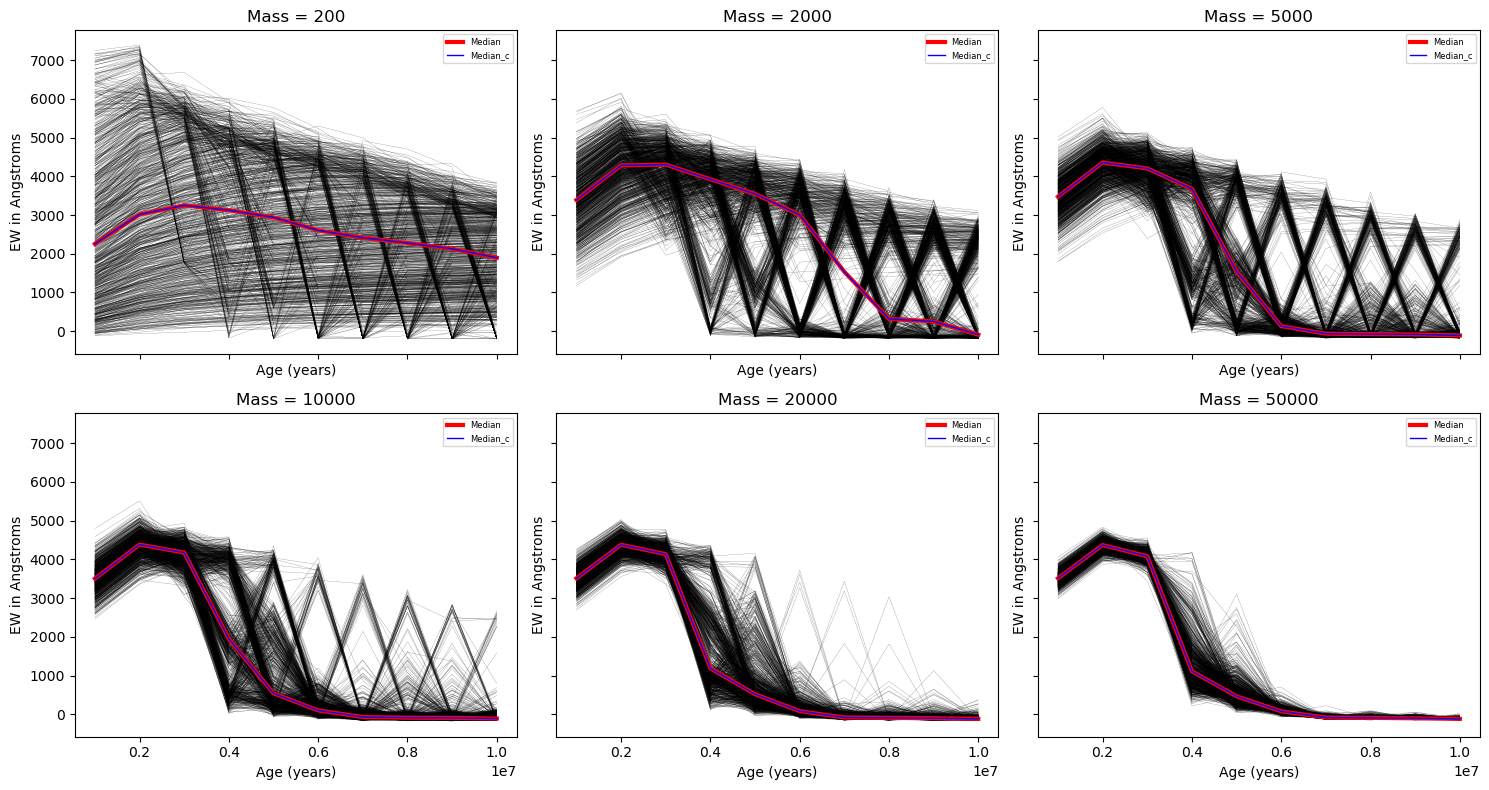

In [305]:

masses = [200, 2000, 5000, 10000, 20000, 50000]

# Determine grid size (e.g. 2 rows x 3 columns for 6 plots)
n_cols = 3
n_rows = int(np.ceil(len(masses) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i, m in enumerate(masses):
    data = np.load(f'/d/ret1/Taylor/jupyter_notebooks/Research/SLUG_stuff/datasets/young_{m}_mass_EW.npy')
    
    ax = axes[i]
    chunk_data = []
    c_chunk_data = []
    for chunk in range(1000):
        start = 10*chunk
        ax.plot(data[0][start:start+10], data[1][start:start+10], linewidth = 0.1, color = 'black')
        chunk_data.append(data[1][start:start+10])
        c_chunk_data.append(data[2][start:start+10])
        
    chunk_data = np.array(chunk_data)  # shape: (100, 10)
    c_chunk_data = np.array(chunk_data)  # shape: (100, 10)
    
    # Calculate median across chunks for each timestep
    median_y = np.nanmedian(chunk_data, axis=0)
    median_y_c = np.nanmedian(c_chunk_data, axis=0)
    
    # Overplot median track
    ax.plot(data[0][start:start+10], median_y, color='red', linewidth=3, label='Median')
    ax.plot(data[0][start:start+10], median_y_c, color='blue', linewidth=1, label='Median_c')
    
    ax.set_title(f'Mass = {m}')
    ax.set_xlabel('Age (years)')
    ax.set_ylabel('EW in Angstroms')
    ax.legend(fontsize=6)
# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [295]:
for x in temp:
    print(x)

UniqueID
Time
FormTime
Lifetime
TargetMass
BirthMass
LiveMass
StellarMass
NumStar
MaxStarMass
A_V
A_Vneb
JWST_F150W
JWST_F187N
JWST_F200W
JWST_F150W_n
JWST_F187N_n
JWST_F200W_n
JWST_F150W_ex
JWST_F187N_ex
JWST_F200W_ex
JWST_F150W_nex
JWST_F187N_nex
JWST_F200W_nex
Symbol
Z
A
Yield
TotSN
StochSN
mDot
pDot
LMech


In [1]:
temp['JWST_F187N_n']

NameError: name 'temp' is not defined

In [297]:
test

array([[ 1.00000000e+06,  2.00000000e+06,  3.00000000e+06, ...,
         9.80000000e+07,  9.90000000e+07,  1.00000000e+08],
       [ 3.35450756e+03,  4.20351762e+03,  4.01105297e+03, ...,
        -1.25118437e+02, -1.31378098e+02, -1.29386772e+02]])